In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
import re

In [2]:
# nltk:
# Uses: 1. Tokenization: splitting text into words
# 2. Stopword removal: removing words like is, the, and
# 3. Stemming and Lemmatization: Reducing the words into their root form
# 4. Part-of-speech tagging: nouns, verbs, adjectives
# 5. Named Entity Recognition: Identifying names, places, dates

In [3]:
# re
# Uses: 1. Find patterns in data
# 2. Replace substring using regex
# 3. Validate inputs (emails, phone, numbers)
# 4. Split text based on patterns

In [4]:
df=pd.read_csv('text_emotions.csv')
df

,content,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness
19996,i constantly worry about their fight against n...,joy
19997,i feel its important to share this info for th...,joy
19998,i truly feel that if you are passionate enough...,joy


In [5]:
print('Dataset Size: ',df.shape)
print('Columns: ',df.columns)
y=df['sentiment']

Dataset Size:  (20000, 2)
Columns:  Index(['content', 'sentiment'], dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    20000 non-null  object
 1   sentiment  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [7]:
df.describe()

,content,sentiment
count,20000,20000
unique,19948,6
top,i have chose for myself that makes me feel ama...,joy
freq,2,6761


<Axes: xlabel='sentiment', ylabel='count'>

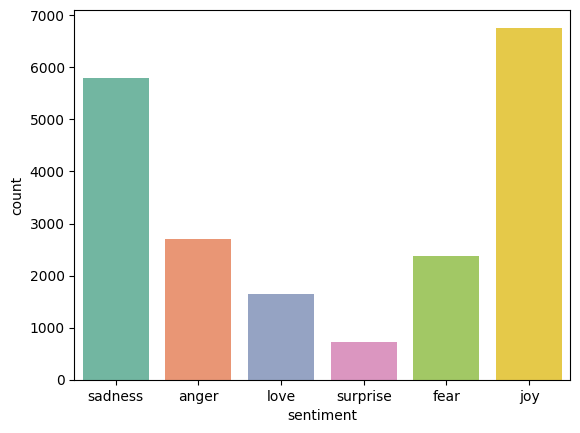

In [8]:
sns.countplot(x='sentiment',hue='sentiment', data=df, legend=False, palette="Set2")

In [9]:
# Pre-processing of Data

In [10]:
# 1. Remove Punctuations
emojis = pd.read_csv('emojis.txt',sep=',',header=None)
emojis_dict = {i:j for i,j in zip(emojis[0],emojis[1])} # Creates a dictionary with each emoji mapped to its meaning 
pattern = '|'.join(sorted(re.escape(k) for k in emojis_dict))

def replace_emojis(text): # It replaces emoji with their mapped values in the given text
    text = re.sub(pattern,lambda m: emojis_dict.get(m.group(0)), text, flags=re.IGNORECASE)
    return text

def remove_punct(text): # It removes punctuation marks from the text
    text = replace_emojis(text)
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['content'].apply(lambda x: remove_punct(x))
df.head(10)

,content,sentiment,Tweet_punct
0,i didnt feel humiliated,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...
9,i feel romantic too,love,i feel romantic too


In [11]:
# 2. Tokenization

def tokenization(text):
    text = text.lower() # It converts the text into lower case
    text = re.split(r'\W+', text) # It split text into tokens by removing punctuation marks, spaces and special characters
    
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head(10)

,content,sentiment,Tweet_punct,Tweet_tokenized
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late..."
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,..."
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te..."
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,..."
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]"


In [12]:
#3. Remove Stopwords
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week',
              'treatment', 'associated', 'patients', 'may','day', 'case','old','u','n','didnt','ive','ate','feel','keep'
                ,'brother','dad','basic','im'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def remove_stopwords(text): # Remove stopwords from text
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,content,sentiment,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]",[humiliated]
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[grabbing, minute, post, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late...","[feeling, little, burdened, lately, wasnt, sure]"
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,...","[taking, milligrams, times, recommended, amoun..."
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te...","[confused, life, teenager, jaded]"
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,...","[petronas, years, petronas, performed, well, m..."
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]",[romantic]


In [14]:
# 4. Lemmatization
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,content,sentiment,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_lemmatized
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]",[humiliated],[humiliated]
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[grabbing, minute, post, greedy, wrong]","[grabbing, minute, post, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feeling, grouchy]"


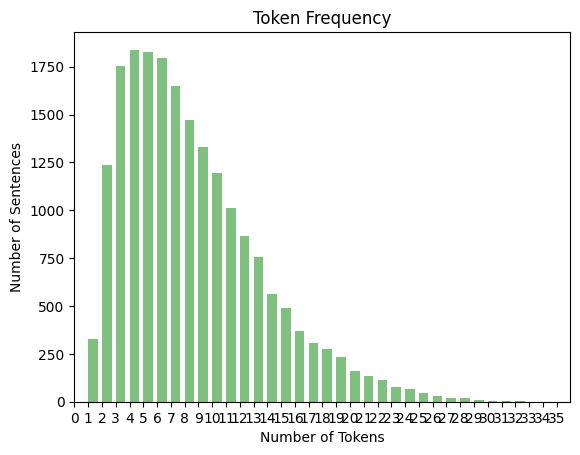

In [15]:
# Calculating Token Frequency in a sentence
token_lengths = [len(t) for t in df['Tweet_lemmatized']]
plt.hist(token_lengths,bins=33,width = 0.7, fc="green",alpha=0.5)
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Sentences')
plt.title('Token Frequency')
x_Values = [i for i in range(36)] 
plt.xticks(x_Values)
plt.xlim(0,36)
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

# This graph basically shows how many sentences have token length (number of tokens in a particular sentence)in the range between 0 to 35

In [16]:
# Text Preprocessing
def clean_text(text):
    text = remove_punct(text)
    text = tokenization(text)
    text = remove_stopwords(text)
    text = lemmatizer(text)
    return text

In [17]:
# Feature Extraction

Vocabulary:  {'time': 6, 'flies': 3, 'like': 5, 'an': 0, 'arrow': 1, 'fruit': 4, 'banana': 2}
Encoded Document is:
[[1 1 0 2 0 1 1]
 [0 0 1 1 1 1 0]]
['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']


<Axes: >

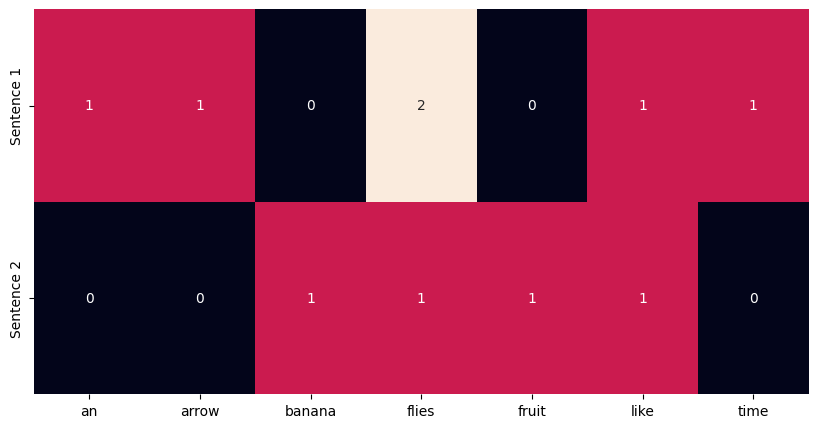

In [18]:
# Count Vectorizer : Here we assign a numerical value to each unique word in the sentence and represent it in the form of a matrix where the values in the matrix denotes the number of times that word appears in that sentence
from sklearn.feature_extraction.text import CountVectorizer
document = ["Time flies flies like an arrow",
            "Fruit flies like a banana"]
  
# Create a Vectorizer Object
vectorizer = CountVectorizer()
  
vectorizer.fit(document)
  
# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)
  
# Encode the Document
vector = vectorizer.transform(document)
  
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

dictionary = sorted(vectorizer.vocabulary_)

print(dictionary)

sns.heatmap(vector.toarray(), annot=True, cbar=False, xticklabels=dictionary,
                                             yticklabels=['Sentence 1','Sentence 2'])

[[0.42519636 0.42519636 0.         0.60506143 0.         0.30253071
  0.42519636]
 [0.         0.         0.57615236 0.40993715 0.57615236 0.40993715
  0.        ]]
{'time': 6, 'flies': 3, 'like': 5, 'an': 0, 'arrow': 1, 'fruit': 4, 'banana': 2}
['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']


<Axes: >

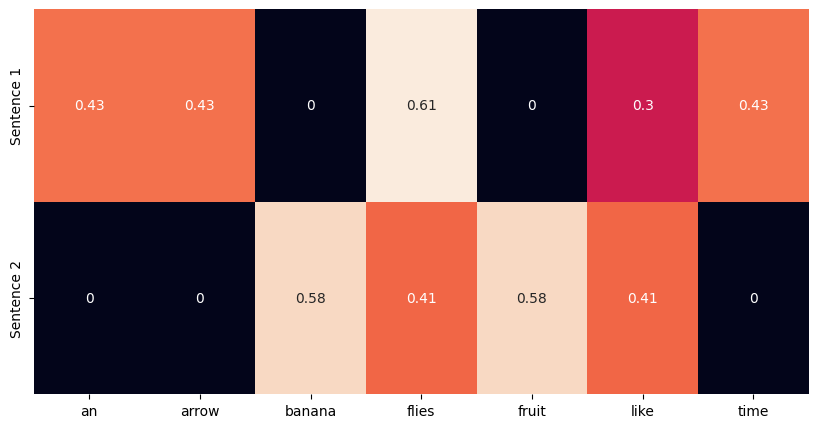

In [19]:
# TF-IDF : It is used to find the words that are important in a document, compared to all other words. If we were to just count the number of frequently occuring words then 'the', 'is', 'a' would be dominating the entire document and would provide no useful information. This method gives weight to the words that are occuring with low frequency. 
from sklearn.feature_extraction.text import TfidfVectorizer

document = ['Time flies flies like an arrow.',
          'Fruit flies like a banana.']

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(document).toarray()

print (tfidf)

print (tfidf_vectorizer.vocabulary_)

dictionary = sorted(tfidf_vectorizer.vocabulary_)

print(dictionary)

sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=dictionary,
                                           yticklabels=['Sentence 1','Sentence 2'])

In [20]:
# Applying Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'],test_size=0.3, random_state = 0)

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
countVectorizer1 = CountVectorizer(analyzer=clean_text)
countVector1 = countVectorizer1.fit_transform(X_train)

countVector2 = countVectorizer1.transform(X_test)

tfidf_transformer_xtrain = TfidfTransformer()
x_train = tfidf_transformer_xtrain.fit_transform(countVector1)

tfidf_transformer_xtest = TfidfTransformer()
x_test = tfidf_transformer_xtest.fit_transform(countVector2)

In [22]:
# Classifier Model Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree

In [23]:
# Performance Matrix Libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [24]:
# Model Training

In [25]:
# Support Vector Machine (SVM)
svm = SGDClassifier()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

svm_acc = accuracy_score(y_pred, y_test)
svm_prec = precision_score(y_test, y_pred, average='macro')
svm_recal = recall_score(y_test, y_pred, average='macro')
svm_cm = confusion_matrix(y_test,y_pred)
svm_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(svm_acc*100))
print('Precision:', '{0:.3f}'.format(svm_prec*100))
print('Recall:', '{0:.3f}'.format(svm_recal*100))
print('F1-score:', '{0:.3f}'.format(svm_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 89.483
Precision: 88.549
Recall: 83.426
F1-score: 85.674
              precision    recall  f1-score   support

       anger       0.91      0.85      0.88       828
        fear       0.89      0.84      0.86       741
         joy       0.89      0.95      0.92      2019
        love       0.84      0.75      0.80       484
     sadness       0.91      0.95      0.93      1715
    surprise       0.87      0.67      0.76       213

    accuracy                           0.89      6000
   macro avg       0.89      0.83      0.86      6000
weighted avg       0.89      0.89      0.89      6000



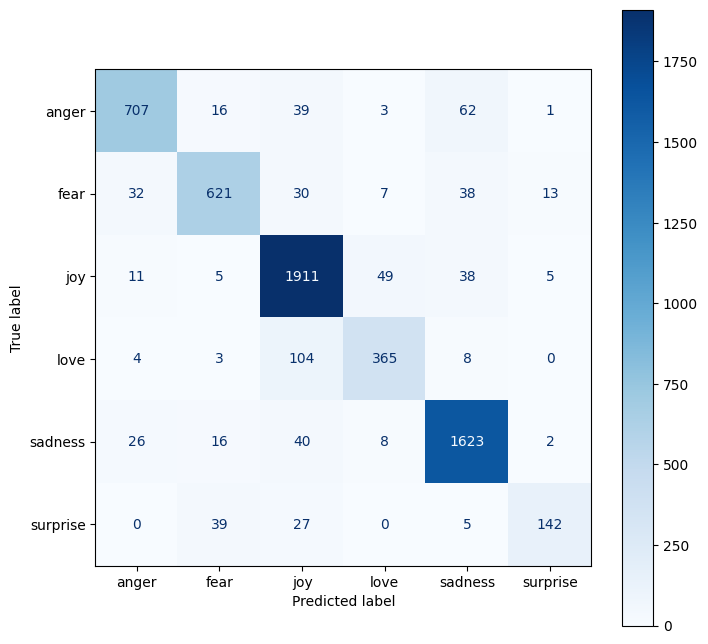

In [26]:
# Confusion Matrix
cm_display_svm = ConfusionMatrixDisplay(svm_cm, display_labels=svm.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_svm.plot(ax=ax,cmap='Blues')

In [27]:
# Logistic Regression
logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train)

y_pred = logisticRegr.predict(x_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_test, y_pred, average='macro')
lr_recal = recall_score(y_test, y_pred, average='macro')
lr_cm = confusion_matrix(y_test,y_pred)
lr_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(lr_acc*100))
print('Precision:', '{0:.3f}'.format(lr_prec*100))
print('Recall:', '{0:.3f}'.format(lr_recal*100))
print('F1-score:', '{0:.3f}'.format(lr_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 86.200
Precision: 87.959
Recall: 76.543
F1-score: 80.762
              precision    recall  f1-score   support

       anger       0.91      0.78      0.84       828
        fear       0.87      0.77      0.82       741
         joy       0.82      0.95      0.88      2019
        love       0.87      0.64      0.73       484
     sadness       0.88      0.94      0.91      1715
    surprise       0.92      0.52      0.66       213

    accuracy                           0.86      6000
   macro avg       0.88      0.77      0.81      6000
weighted avg       0.87      0.86      0.86      6000



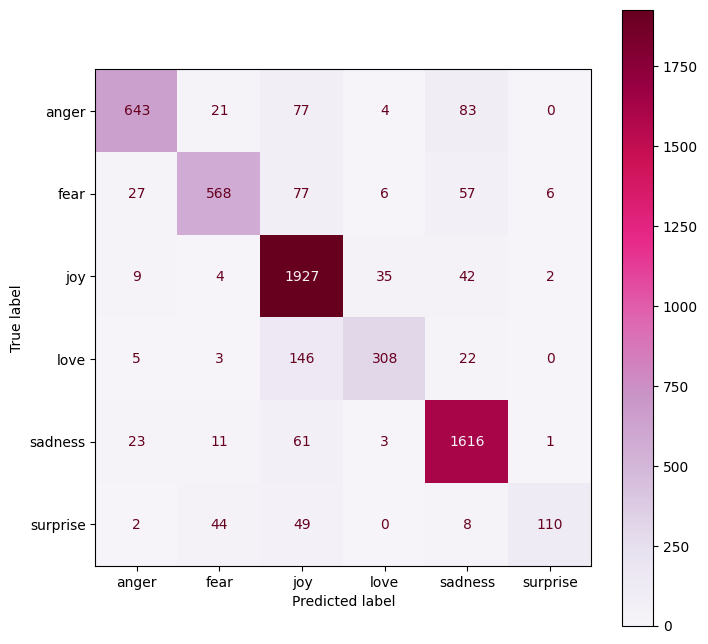

In [28]:
# Confusion Matrix
cm_display_lr = ConfusionMatrixDisplay(lr_cm, display_labels=logisticRegr.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_lr.plot(ax=ax,cmap='PuRd')

In [29]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=1, random_state=0)

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

rfc_acc = accuracy_score(y_pred, y_test)
rfc_prec = precision_score(y_test, y_pred, average='macro')
rfc_recal = recall_score(y_test, y_pred, average='macro')
rfc_cm = confusion_matrix(y_test,y_pred)
rfc_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(rfc_acc*100))
print('Precision:', '{0:.3f}'.format(rfc_prec*100))
print('Recall:', '{0:.3f}'.format(rfc_recal*100))
print('F1-score:', '{0:.3f}'.format(rfc_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 73.533
Precision: 71.713
Recall: 67.389
F1-score: 69.107
              precision    recall  f1-score   support

       anger       0.69      0.70      0.69       828
        fear       0.74      0.74      0.74       741
         joy       0.76      0.78      0.77      2019
        love       0.73      0.52      0.60       484
     sadness       0.74      0.79      0.76      1715
    surprise       0.65      0.52      0.58       213

    accuracy                           0.74      6000
   macro avg       0.72      0.67      0.69      6000
weighted avg       0.73      0.74      0.73      6000



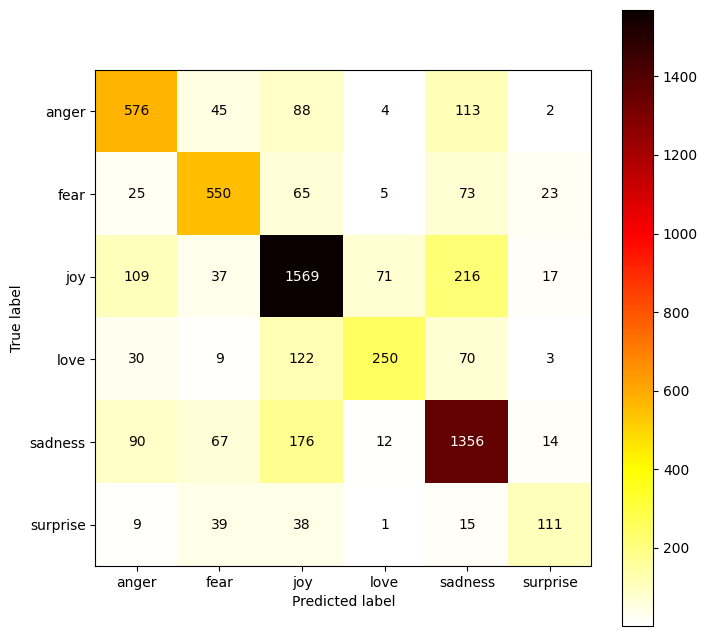

In [30]:
# Confusion Matrix
cm_display_rfc = ConfusionMatrixDisplay(rfc_cm, display_labels=rfc.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_rfc.plot(ax=ax,cmap='hot_r')

In [31]:
# Multinomial naive Bayes Classifier
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

y_pred = mnb.predict(x_test)

mnb_acc = accuracy_score(y_pred, y_test)
mnb_prec = precision_score(y_test, y_pred, average='macro')
mnb_recal = recall_score(y_test, y_pred, average='macro')
mnb_cm = confusion_matrix(y_test,y_pred)
mnb_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(mnb_acc*100))
print('Precision:', '{0:.3f}'.format(mnb_prec*100))
print('Recall:', '{0:.3f}'.format(mnb_recal*100))
print('F1-score:', '{0:.3f}'.format(mnb_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 67.633
Precision: 85.613
Recall: 43.058
F1-score: 43.576
              precision    recall  f1-score   support

       anger       0.95      0.34      0.50       828
        fear       0.88      0.26      0.40       741
         joy       0.63      0.97      0.77      2019
        love       1.00      0.07      0.13       484
     sadness       0.67      0.93      0.78      1715
    surprise       1.00      0.02      0.04       213

    accuracy                           0.68      6000
   macro avg       0.86      0.43      0.44      6000
weighted avg       0.76      0.68      0.61      6000



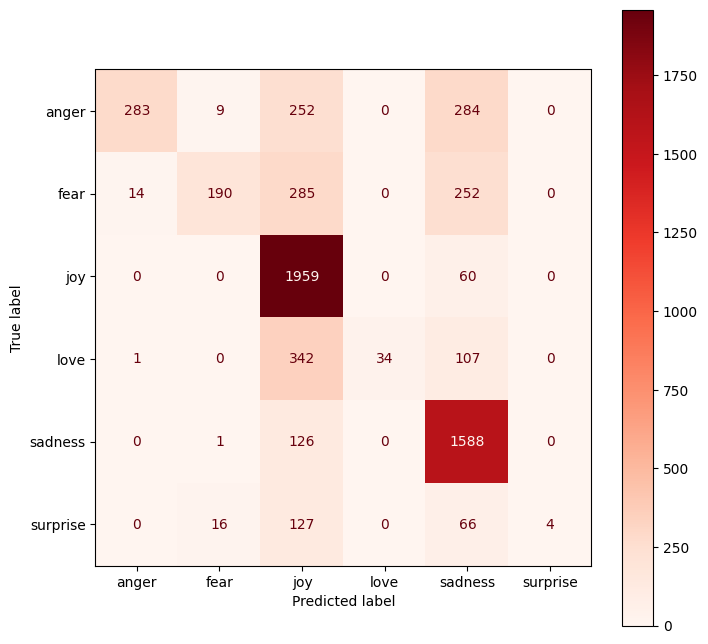

In [32]:
# Confusion Matrix
cm_display_mnb = ConfusionMatrixDisplay(mnb_cm, display_labels=mnb.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_mnb.plot(ax=ax,cmap='Reds')

In [33]:
# Decision Tree Classifier
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)


dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_test, y_pred, average='macro')
dt_recal = recall_score(y_test, y_pred, average='macro')
dt_cm = confusion_matrix(y_test,y_pred)
dt_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(dt_acc*100))
print('Precision:', '{0:.3f}'.format(dt_prec*100))
print('Recall:', '{0:.3f}'.format(dt_recal*100))
print('F1-score:', '{0:.3f}'.format(dt_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 86.883
Precision: 83.225
Recall: 84.176
F1-score: 83.646
              precision    recall  f1-score   support

       anger       0.88      0.85      0.87       828
        fear       0.82      0.86      0.84       741
         joy       0.92      0.87      0.89      2019
        love       0.75      0.82      0.78       484
     sadness       0.88      0.92      0.90      1715
    surprise       0.74      0.74      0.74       213

    accuracy                           0.87      6000
   macro avg       0.83      0.84      0.84      6000
weighted avg       0.87      0.87      0.87      6000



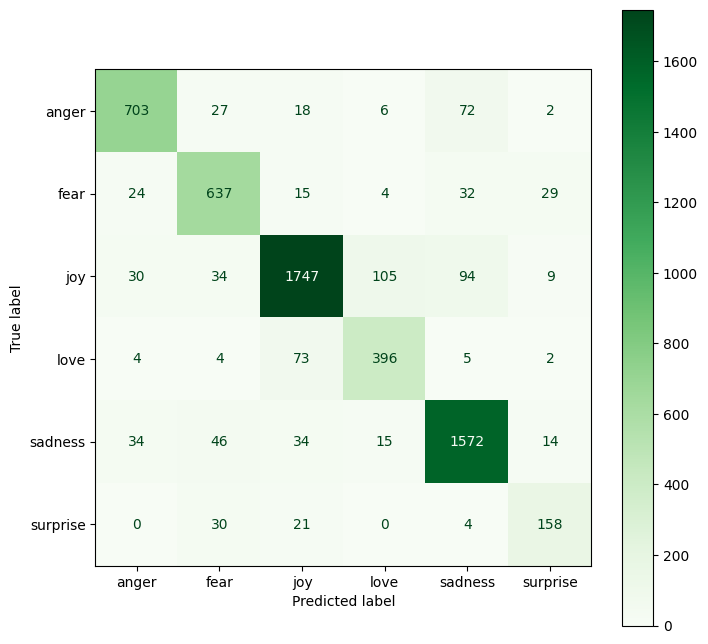

In [34]:
# Confusion Matrix
cm_display_dt = ConfusionMatrixDisplay(dt_cm, display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_dt.plot(ax=ax,cmap='Greens')

In [35]:
# Summary Visualization

def get_prec_recall_per_emotion(cm):
    per_emotion_precision = []
    for i in range(len(cm)):
        count_per_emotion,accurate = 0,0
        for j in range(len(cm)):
            if i == j:
                accurate = cm[j][i]
            count_per_emotion += cm[j][i]
        per_emotion_precision.append(round((accurate/count_per_emotion)*100,3))
        
    per_emotion_recall = []
    for i in range(len(cm)):
        count_per_emotion,accurate = 0,0
        for j in range(len(cm)):
            if i == j:
                accurate = cm[i][j]
            count_per_emotion += cm[i][j]
        per_emotion_recall.append(round((accurate/count_per_emotion)*100,3))
        
    return per_emotion_precision, per_emotion_recall

In [36]:
# Precision of all models
svm_per_prec,svm_per_recall = get_prec_recall_per_emotion(svm_cm)
lr_per_prec,lr_per_recall = get_prec_recall_per_emotion(lr_cm)
rfc_per_prec,rfc_per_recall = get_prec_recall_per_emotion(rfc_cm)
mnb_per_prec,mnb_per_recall = get_prec_recall_per_emotion(mnb_cm)
dt_per_prec,dt_per_recall = get_prec_recall_per_emotion(dt_cm)

per_precision_list = pd.DataFrame({'Support vector Machine' : svm_per_prec,
                                'Logistic Regression' : lr_per_prec,
                                'Random Forest' : rfc_per_prec,
                                'Naive Bayes' : mnb_per_prec,
                                'Decision Tree' : dt_per_prec}, 
                                index=svm.classes_)
per_precision_list

,Support vector Machine,Logistic Regression,Random Forest,Naive Bayes,Decision Tree
anger,90.641,90.691,68.653,94.966,88.428
fear,88.714,87.250,73.628,87.963,81.877
joy,88.842,82.456,76.239,63.378,91.562
love,84.491,86.517,72.886,100.000,75.285
sadness,91.488,88.403,73.576,67.374,88.364
surprise,87.117,92.437,65.294,100.000,73.832


In [37]:
# Recall of all models
per_recall_list = pd.DataFrame({'Support vector Machine' : svm_per_recall,
                                'Logistic Regression' : lr_per_recall,
                                'Random Forest' : rfc_per_recall,
                                'Naive Bayes' : mnb_per_recall,
                                'Decision Tree' : dt_per_recall}, 
                                index=svm.classes_)
per_recall_list

,Support vector Machine,Logistic Regression,Random Forest,Naive Bayes,Decision Tree
anger,85.386,77.657,69.565,34.179,84.903
fear,83.806,76.653,74.224,25.641,85.965
joy,94.651,95.443,77.712,97.028,86.528
love,75.413,63.636,51.653,7.025,81.818
sadness,94.636,94.227,79.067,92.595,91.662
surprise,66.667,51.643,52.113,1.878,74.178


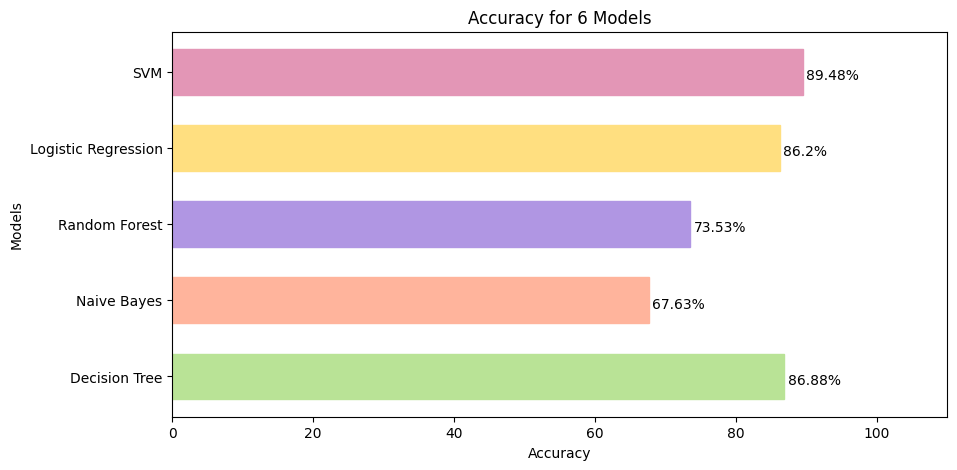

In [38]:
# Accuracy Visualization of all models

algorithms = ['SVM','Logistic Regression','Random Forest','Naive Bayes','Decision Tree']
algorithm_acc = [svm_acc*100, lr_acc*100, rfc_acc*100, mnb_acc*100, dt_acc*100]

algorithms = ['Decision Tree','Naive Bayes','Random Forest','Logistic Regression','SVM']
algorithm_acc = [dt_acc*100, mnb_acc*100, rfc_acc*100, lr_acc*100, svm_acc*100]
# Figure Size
fig = plt.figure(figsize =(10, 5))
bar_list = plt.barh(algorithms, algorithm_acc,height = 0.6,color='black')
# bar_list[5].set_color('#7CAADE')
bar_list[4].set_color('#E396B6')
bar_list[3].set_color('#FFDF80')
bar_list[2].set_color('#B096E3')
bar_list[1].set_color('#FFB49C')
bar_list[0].set_color('#B9E396')
plt.xlabel('Accuracy',color='black')
plt.ylabel('Models',color='black')
plt.title('Accuracy for 6 Models')
plt.xlim(0,110)

for i, v in enumerate(algorithm_acc):
    plt.text(v + 0.5, i - 0.1, str(round(v,2))+'%', color='black',fontsize=10)
    
plt.show()

In [40]:
# Predicton
while True:
    input_str = input("What's in your mind: ")
    if input_str == 'nothing':
        break
        
    processed_text = tfidf_transformer_xtest.fit_transform(countVectorizer1.transform([input_str]))
    print('Emotion using SVM: ',end = '')
    print(svm.predict(processed_text))
    print('Emotion using Logistic Regression: ',end = '')
    print(logisticRegr.predict(processed_text))
    print('Emotion using Decision Tree: ',end = '')
    print(dt.predict(processed_text))
    print('Emotion using Naive Bayes: ',end = '')
    print(mnb.predict(processed_text))
    print('Emotion using Random Forest: ',end = '')
    print(rfc.predict(processed_text))

What's in your mind:  :), i suppose, I am happy


Emotion using SVM: ['joy']
Emotion using Logistic Regression: ['joy']
Emotion using Decision Tree: ['joy']
Emotion using Naive Bayes: ['joy']
Emotion using Random Forest: ['joy']


What's in your mind:  nothing
